<a href="https://colab.research.google.com/github/niharikatewari/Tweet-Emotion-Recognition-/blob/main/Copy_of_Tweet_Emotion_Recognition_Learner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tweet Emotion Recognition: Natural Language Processing with TensorFlow

---

Dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)

This is a starter notebook for the guided project [Tweet Emotion Recognition with TensorFlow](https://www.coursera.org/projects/tweet-emotion-tensorflow)

A complete version of this notebook is available in the course resources

---

## Task 1: Introduction

## Task 2: Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [97]:
!pip install nlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [98]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()

    
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.8.2


## Task 3: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [99]:
dataset = nlp.load_dataset('emotion')

In [100]:
dataset

{'train': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 16000),
 'validation': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000),
 'test': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000)}

In [101]:
train = dataset['train']
val = dataset['validation']
test = dataset['test']

In [102]:
def get_tweet(data):
  tweets = [x['text'] for x in data]
  labels = [x['label'] for x in data]
  return tweets, labels

In [103]:
tweets, labels = get_tweet(train)

In [104]:
tweets[1], labels[1]

('i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'sadness')

## Task 4: Tokenizer

1. Tokenizing the tweets

In [105]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [106]:
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')
tokenizer.fit_on_texts(tweets)

In [107]:
tokenizer.texts_to_sequences([tweets[0]])

[[2, 139, 3, 679]]

In [108]:
tweets[0]

'i didnt feel humiliated'

## Task 5: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

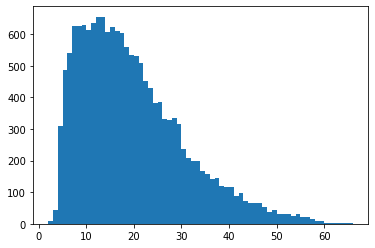

In [109]:
lengths = [len(t.split(' '))for t in tweets]
plt.hist(lengths, bins = len(set(lengths)))
plt.show()

In [110]:
maxlen = 50

from tensorflow.keras.preprocessing.sequence import pad_sequences


In [111]:
def get_sequences(tokenizer, tweets):
  sequences = tokenizer.texts_to_sequences(tweets)
  padded = pad_sequences(sequences, truncating='post', padding='post', maxlen=maxlen)
  return padded

In [112]:
padded_train_seq = get_sequences(tokenizer, tweets)

In [113]:
padded_train_seq[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

## Task 6: Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [114]:
classes= set(labels)
print(classes)

{'anger', 'fear', 'joy', 'sadness', 'surprise', 'love'}


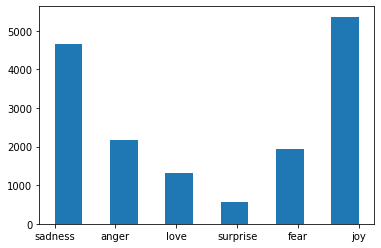

In [115]:
plt.hist(labels, bins=11)
plt.show()

In [116]:
class_to_index = dict((c,i) for i,c in enumerate(classes))
index_to_class = dict((v,k) for k,v in class_to_index.items())

In [117]:
class_to_index

{'anger': 0, 'fear': 1, 'joy': 2, 'sadness': 3, 'surprise': 4, 'love': 5}

In [118]:
index_to_class

{0: 'anger', 1: 'fear', 2: 'joy', 3: 'sadness', 4: 'surprise', 5: 'love'}

In [119]:
names_to_ids = lambda labels: np.array([class_to_index.get(x) for x in labels])

In [120]:
train_labels = names_to_ids(labels)
print(train_labels[10])

3


## Task 7: Creating the Model

1. Creating the model
2. Compiling the model

In [121]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000,16, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    #RNN part 
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(
    
    loss = 'sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [122]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 50, 16)            160000    
                                                                 
 bidirectional_8 (Bidirectio  (None, 50, 40)           5920      
 nal)                                                            
                                                                 
 bidirectional_9 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 6)                 246       
                                                                 
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________


## Task 8: Training the Model

1. Preparing a validation set
2. Training the model

In [123]:
val_tweets, val_labels = get_tweet(val)
val_seq = get_sequences(tokenizer, val_tweets)
val_labels = names_to_ids(val_labels)

In [124]:
val_tweets[20], val_labels[20]

('i just know to begin with i am going to feel shy about it', 1)

In [125]:
h = model.fit(
    padded_train_seq, train_labels,
    validation_data=(val_seq, val_labels),
    epochs=20,
    callbacks=[
          tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience= 2)
    ]
)

Epoch 1/20
500/500 [==============================] - 21s 33ms/step - loss: 1.3071 - accuracy: 0.5008 - val_loss: 0.9951 - val_accuracy: 0.6295
Epoch 2/20
500/500 [==============================] - 9s 18ms/step - loss: 0.7204 - accuracy: 0.7276 - val_loss: 0.6703 - val_accuracy: 0.7565
Epoch 3/20
500/500 [==============================] - 6s 12ms/step - loss: 0.4555 - accuracy: 0.8441 - val_loss: 0.5589 - val_accuracy: 0.8040
Epoch 4/20
500/500 [==============================] - 6s 13ms/step - loss: 0.2898 - accuracy: 0.9064 - val_loss: 0.4355 - val_accuracy: 0.8595
Epoch 5/20
500/500 [==============================] - 6s 13ms/step - loss: 0.2053 - accuracy: 0.9351 - val_loss: 0.4493 - val_accuracy: 0.8500
Epoch 6/20
500/500 [==============================] - 6s 12ms/step - loss: 0.1375 - accuracy: 0.9572 - val_loss: 0.3908 - val_accuracy: 0.8755
Epoch 7/20
500/500 [==============================] - 6s 12ms/step - loss: 0.1071 - accuracy: 0.9677 - val_loss: 0.4161 - val_accuracy: 0.878

## Task 9: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

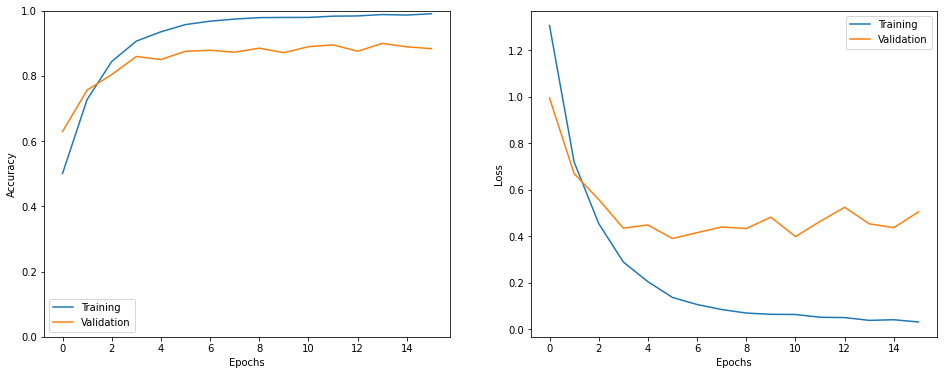

In [126]:
show_history(h)

In [133]:
test_tweets, test_labels = get_tweet(test)
test_seq = get_sequences(tokenizer, test_tweets)
test_labels = names_to_ids(test_labels)

In [134]:
eval = model.evaluate(test_seq, test_labels)


63/63 [==============================] - 0s 7ms/step - loss: 0.5556 - accuracy: 0.8715


In [135]:
for a in range(0,5):
  i = random.randint(0, len(test_labels) - 1)

  print('Sentence:', test_tweets[i])
  print('Emotion:', index_to_class[test_labels[i]])

  p = model.predict(np.expand_dims(test_seq[i], axis=0))[0]

  print('Predicted Emotion:', index_to_class, '\n')

Sentence: i mention my oldest child before my youngest will her feelings be hurt
Emotion: sadness
Predicted Emotion: {0: 'anger', 1: 'fear', 2: 'joy', 3: 'sadness', 4: 'surprise', 5: 'love'} 

Sentence: i feel less frightened and more grounded and centered
Emotion: fear
Predicted Emotion: {0: 'anger', 1: 'fear', 2: 'joy', 3: 'sadness', 4: 'surprise', 5: 'love'} 

Sentence: i wonder if im vain because i love dressing up and attempting to be fashionable but then i realized that there is nothing wrong with dressing so that you feel pretty cute smart whatever
Emotion: joy
Predicted Emotion: {0: 'anger', 1: 'fear', 2: 'joy', 3: 'sadness', 4: 'surprise', 5: 'love'} 

Sentence: im saying this having not read the book the characters were hard to empathise for and a lot of the time i found myself not feeling distraught when something happened but rather uninterested and blank
Emotion: fear
Predicted Emotion: {0: 'anger', 1: 'fear', 2: 'joy', 3: 'sadness', 4: 'surprise', 5: 'love'} 

Sentence: i

In [136]:
preds = model.predict(test_seq)
preds.shape, test_labels.shape

((2000, 6), (2000,))

In [141]:
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()
show_confusion_matrix(test_labels, preds, list(classes))

